In [1]:
import torch
from detect import FaceDetector
from mtcnn_pytorch import PNet, RNet
import matplotlib.pyplot as plt

In [2]:
pnet = PNet()
rnet = RNet()
pnet.load_state_dict(torch.load("/home/srxdhxr/FaceDetector/trainPNet/pnet.pth"),strict=False)
rnet.load_state_dict(torch.load("/home/srxdhxr/FaceDetector/trainPNet/rnet.pth"),strict=False)

/home/srxdhxr/FaceDetector/trainPNet/mtcnn_pytorch.py:9: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.
  nn.init.xavier_uniform(m.weight.data)
/home/srxdhxr/FaceDetector/trainPNet/mtcnn_pytorch.py:10: UserWarning: nn.init.constant is now deprecated in favor of nn.init.constant_.
  nn.init.constant(m.bias, 0.1)


<All keys matched successfully>

In [3]:
fd = FaceDetector(pnet=pnet,rnet = rnet,device="cpu")

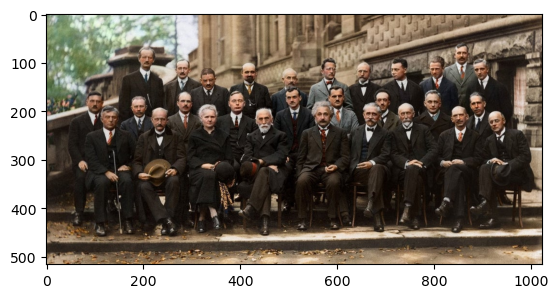

Number of Candidate faces found from PNET torch.Size([1100, 4])


In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import matplotlib.patches as patches
im_dir = 'science.png'
img = Image.open(im_dir)
img_array = np.asarray(img)
plt.imshow(img_array)
plt.show()

boxes = fd.detect(im_dir)

In [5]:
def show_boxes(img, boxes):
    
    # Create figure and axes
    fig, ax = plt.subplots(1)

    # Display the image
    ax.imshow(img)
    for box in boxes:
        # Create a Rectangle patch
        rect = patches.Rectangle((box[0],box[1]),box[2]-box[0],box[3]-box[1],linewidth=1,edgecolor='r',facecolor='none')
        # Add the patch to the Axes
        ax.add_patch(rect)

    plt.show()
    

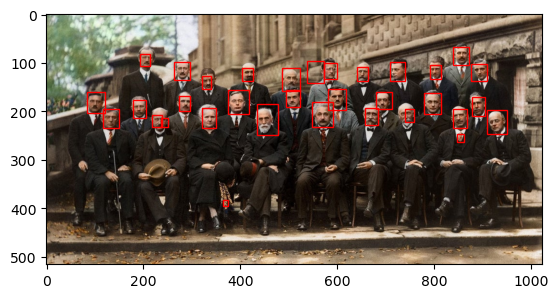

In [6]:
show_boxes(img,boxes)